# Exploratory Data Analysis

## 0. Install Required Libraries

In [91]:
%pip install pandas matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


## 1. Import Libraries

In [92]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Set data path
DATA_DIR = '../data/UIT_HWDB_word'
TRAIN_DIR = os.path.join(DATA_DIR, 'train_data')
TEST_DIR = os.path.join(DATA_DIR, 'test_data')

## 2. Data Structure Overview

In [93]:
# Get list of train and test folders
train_folders = sorted([f for f in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, f))], key=lambda x: int(x))
test_folders = sorted([f for f in os.listdir(TEST_DIR) if os.path.isdir(os.path.join(TEST_DIR, f))], key=lambda x: int(x))

print(f"Number of training folders: {len(train_folders)}")
print(f"Training folder range: {train_folders[0]} to {train_folders[-1]}")
print(f"\nNumber of test folders: {len(test_folders)}")
print(f"Test folder range: {test_folders[0]} to {test_folders[-1]}")

Number of training folders: 249
Training folder range: 1 to 249

Number of test folders: 6
Test folder range: 250 to 255


## 3. Load and Parse Data

In [94]:
def load_dataset(base_dir, folders):
    """Load all labels from label.json files in the dataset."""
    data = []
    
    for folder in folders:
        label_path = os.path.join(base_dir, folder, 'label.json')
        if os.path.exists(label_path):
            with open(label_path, 'r', encoding='utf-8') as f:
                labels = json.load(f)
                for img_name, label in labels.items():
                    data.append({
                        'folder': folder,
                        'image': img_name,
                        'label': label.strip(),
                        'image_path': os.path.join(base_dir, folder, img_name)
                    })
    
    return pd.DataFrame(data)

# Load training and test data
print("Loading training data...")
train_df = load_dataset(TRAIN_DIR, train_folders)
print(f"Training samples: {len(train_df)}")

print("\nLoading test data...")
test_df = load_dataset(TEST_DIR, test_folders)
print(f"Test samples: {len(test_df)}")

print(f"\nTotal samples: {len(train_df) + len(test_df)}")

Loading training data...
Training samples: 107607

Loading test data...
Test samples: 2881

Total samples: 110488


In [95]:
# Display first few samples
print("Training data samples:")
display(train_df.head(10))

print("\nTest data samples:")
display(test_df.head(10))

Training data samples:


folder  image label                                image_path
0      1  1.jpg  KHÁI  ../data/UIT_HWDB_word/train_data/1/1.jpg
1      1  2.jpg  QUÁT  ../data/UIT_HWDB_word/train_data/1/2.jpg
2      1  3.jpg    VỀ  ../data/UIT_HWDB_word/train_data/1/3.jpg
3      1  4.jpg  BIỂN  ../data/UIT_HWDB_word/train_data/1/4.jpg
4      1  5.jpg   ĐẢO  ../data/UIT_HWDB_word/train_data/1/5.jpg
5      2  1.jpg    Cả  ../data/UIT_HWDB_word/train_data/2/1.jpg
6      2  2.jpg   sới  ../data/UIT_HWDB_word/train_data/2/2.jpg
7      2  3.jpg    gà  ../data/UIT_HWDB_word/train_data/2/3.jpg
8      2  4.jpg   náo  ../data/UIT_HWDB_word/train_data/2/4.jpg
9      2  5.jpg  động  ../data/UIT_HWDB_word/train_data/2/5.jpg


Test data samples:


folder   image   label                                  image_path
0    250   1.jpg     Thứ   ../data/UIT_HWDB_word/test_data/250/1.jpg
1    250   2.jpg  trưởng   ../data/UIT_HWDB_word/test_data/250/2.jpg
2    250   3.jpg      Bộ   ../data/UIT_HWDB_word/test_data/250/3.jpg
3    250   4.jpg     Tài   ../data/UIT_HWDB_word/test_data/250/4.jpg
4    250   5.jpg  nguyên   ../data/UIT_HWDB_word/test_data/250/5.jpg
5    250   6.jpg     môi   ../data/UIT_HWDB_word/test_data/250/6.jpg
6    250   7.jpg  trường   ../data/UIT_HWDB_word/test_data/250/7.jpg
7    250   8.jpg    Đặng   ../data/UIT_HWDB_word/test_data/250/8.jpg
8    250   9.jpg    Hùng   ../data/UIT_HWDB_word/test_data/250/9.jpg
9    250  10.jpg      Võ  ../data/UIT_HWDB_word/test_data/250/10.jpg

## 4. Dataset Statistics

In [96]:
# Basic statistics
print("=" * 60)
print("DATASET STATISTICS")
print("=" * 60)

print("\n📊 Overall Statistics:")
print(f"  • Total training samples: {len(train_df):,}")
print(f"  • Total test samples: {len(test_df):,}")
print(f"  • Train/Test ratio: {len(train_df)/len(test_df):.2f}")

print("\n📝 Vocabulary Statistics:")
train_vocab = set(train_df['label'].unique())
test_vocab = set(test_df['label'].unique())
print(f"  • Unique words in training: {len(train_vocab)}")
print(f"  • Unique words in test: {len(test_vocab)}")
print(f"  • Words in both sets: {len(train_vocab & test_vocab)}")
print(f"  • Words only in training: {len(train_vocab - test_vocab)}")
print(f"  • Words only in test: {len(test_vocab - train_vocab)}")

print("\n📁 Folder Statistics:")
print(f"  • Training folders: {len(train_folders)}")
print(f"  • Test folders: {len(test_folders)}")
print(f"  • Avg images per training folder: {len(train_df) / len(train_folders):.1f}")
print(f"  • Avg images per test folder: {len(test_df) / len(test_folders):.1f}")

DATASET STATISTICS

📊 Overall Statistics:
  • Total training samples: 107,607
  • Total test samples: 2,881
  • Train/Test ratio: 37.35

📝 Vocabulary Statistics:
  • Unique words in training: 3509
  • Unique words in test: 846
  • Words in both sets: 844
  • Words only in training: 2665
  • Words only in test: 2

📁 Folder Statistics:
  • Training folders: 249
  • Test folders: 6
  • Avg images per training folder: 432.2
  • Avg images per test folder: 480.2


## 5. Label Distribution Analysis

In [97]:
# Label frequency analysis
train_label_counts = train_df['label'].value_counts()
test_label_counts = test_df['label'].value_counts()

print("Training Set Label Distribution:")
print(f"  • Most common: {train_label_counts.head(10).to_dict()}")
print(f"  • Least common (sample): {train_label_counts.tail(10).to_dict()}")
print(f"\n  • Max frequency: {train_label_counts.max()}")
print(f"  • Min frequency: {train_label_counts.min()}")
print(f"  • Mean frequency: {train_label_counts.mean():.2f}")
print(f"  • Median frequency: {train_label_counts.median():.2f}")

print("\n" + "="*60)
print("\nTest Set Label Distribution:")
print(f"  • Most common: {test_label_counts.head(10).to_dict()}")
print(f"  • Least common (sample): {test_label_counts.tail(10).to_dict()}")
print(f"\n  • Max frequency: {test_label_counts.max()}")
print(f"  • Min frequency: {test_label_counts.min()}")
print(f"  • Mean frequency: {test_label_counts.mean():.2f}")
print(f"  • Median frequency: {test_label_counts.median():.2f}")

Training Set Label Distribution:
  • Most common: {'có': 1174, 'là': 1097, 'và': 1050, 'người': 1000, 'của': 931, 'một': 885, 'không': 883, 'được': 864, 'công': 780, 'đã': 779}
  • Least common (sample): {'trục': 1, 'báu': 1, 'gìn': 1, 'ố': 1, 'cạn': 1, 'Mưu': 1, 'Đẳng': 1, 'sưa': 1, 'ngán': 1, 'Lãng': 1}

  • Max frequency: 1174
  • Min frequency: 1
  • Mean frequency: 30.67
  • Median frequency: 7.00


Test Set Label Distribution:
  • Most common: {'và': 53, 'của': 39, 'có': 33, 'các': 29, 'là': 26, 'người': 25, 'công': 25, 'với': 22, 'đất': 21, 'nhà': 20}
  • Least common (sample): {'phẩy': 1, 'tới': 1, 'lấy': 1, 'NV1': 1, 'sân': 1, 'chưa': 1, 'luyện': 1, 'khổ': 1, 'đá': 1, 'nuôi': 1}

  • Max frequency: 53
  • Min frequency: 1
  • Mean frequency: 3.41
  • Median frequency: 2.00


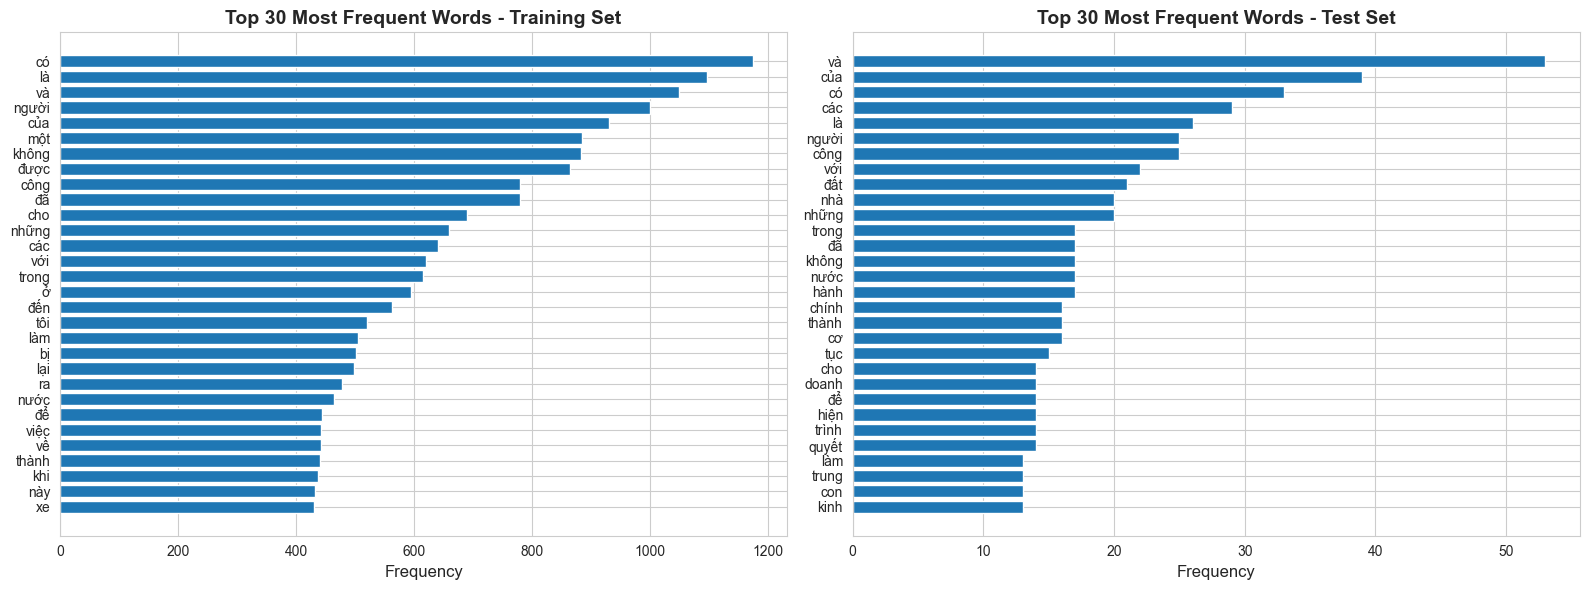

In [98]:
# Visualize label distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 30 most common words in training set
train_top30 = train_label_counts.head(30)
axes[0].barh(range(len(train_top30)), train_top30.values)
axes[0].set_yticks(range(len(train_top30)))
axes[0].set_yticklabels(train_top30.index, fontsize=10)
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_title('Top 30 Most Frequent Words - Training Set', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Top 30 most common words in test set
test_top30 = test_label_counts.head(30)
axes[1].barh(range(len(test_top30)), test_top30.values)
axes[1].set_yticks(range(len(test_top30)))
axes[1].set_yticklabels(test_top30.index, fontsize=10)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_title('Top 30 Most Frequent Words - Test Set', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

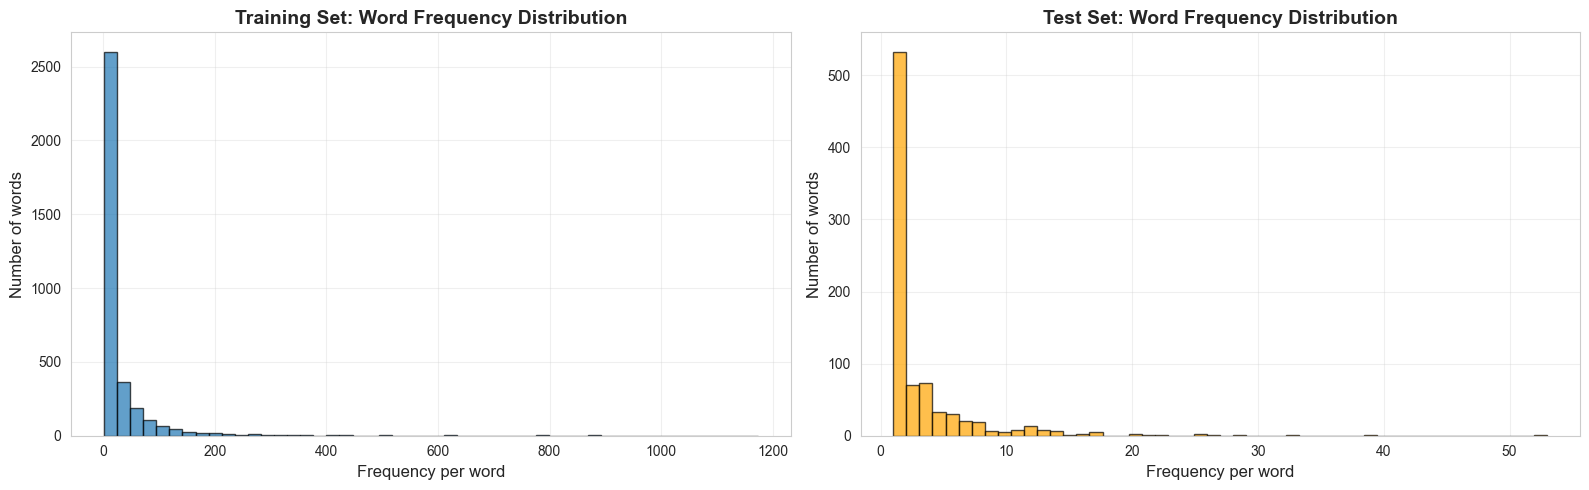

In [99]:
# Distribution histogram
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].hist(train_label_counts.values, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Frequency per word', fontsize=12)
axes[0].set_ylabel('Number of words', fontsize=12)
axes[0].set_title('Training Set: Word Frequency Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].hist(test_label_counts.values, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Frequency per word', fontsize=12)
axes[1].set_ylabel('Number of words', fontsize=12)
axes[1].set_title('Test Set: Word Frequency Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Character-Level Analysis

In [100]:
# Extract all characters
train_chars = Counter(''.join(train_df['label'].tolist()))
test_chars = Counter(''.join(test_df['label'].tolist()))

print("Character Statistics:")
print(f"  • Unique characters in training: {len(train_chars)}")
print(f"  • Unique characters in test: {len(test_chars)}")
print(f"  • Total characters in training: {sum(train_chars.values()):,}")
print(f"  • Total characters in test: {sum(test_chars.values()):,}")

print(f"\n📊 Top 30 most common characters in training:")
for char, count in train_chars.most_common(30):
    print(f"  '{char}': {count:,}")

print(f"\n📊 Top 30 most common characters in test:")
for char, count in test_chars.most_common(30):
    print(f"  '{char}': {count:,}")

Character Statistics:
  • Unique characters in training: 147
  • Unique characters in test: 127
  • Total characters in training: 357,828
  • Total characters in test: 9,780

📊 Top 30 most common characters in training:
  'n': 42,177
  'h': 30,261
  't': 20,651
  'i': 20,316
  'g': 20,249
  'c': 20,249
  'a': 9,621
  'u': 9,589
  'đ': 9,202
  'm': 8,447
  'à': 7,752
  'ư': 6,596
  'o': 6,516
  'r': 5,860
  'l': 5,718
  'v': 5,534
  'y': 5,180
  'á': 4,804
  'b': 4,723
  'p': 4,248
  'k': 4,231
  'ô': 4,120
  'ế': 3,148
  's': 2,994
  'ó': 2,915
  'ạ': 2,883
  'ộ': 2,776
  'ả': 2,761
  'ờ': 2,677
  'ệ': 2,654

📊 Top 30 most common characters in test:
  'n': 1,188
  'h': 952
  'c': 632
  't': 574
  'i': 522
  'g': 500
  'u': 268
  'a': 266
  'đ': 248
  'à': 225
  'm': 202
  'o': 177
  'v': 170
  'ư': 168
  'r': 148
  'l': 146
  'p': 145
  'y': 139
  'á': 129
  'k': 115
  'b': 108
  'ả': 94
  'ô': 92
  'ế': 89
  's': 85
  'ó': 84
  'ạ': 82
  'ệ': 78
  'ộ': 75
  'ấ': 71


Word Length Statistics:

Training Set:
count    107607.000000
mean          3.325323
std           1.048613
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max          11.000000
Name: word_length, dtype: float64

Test Set:
count    2881.000000
mean        3.394655
std         1.042879
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: word_length, dtype: float64


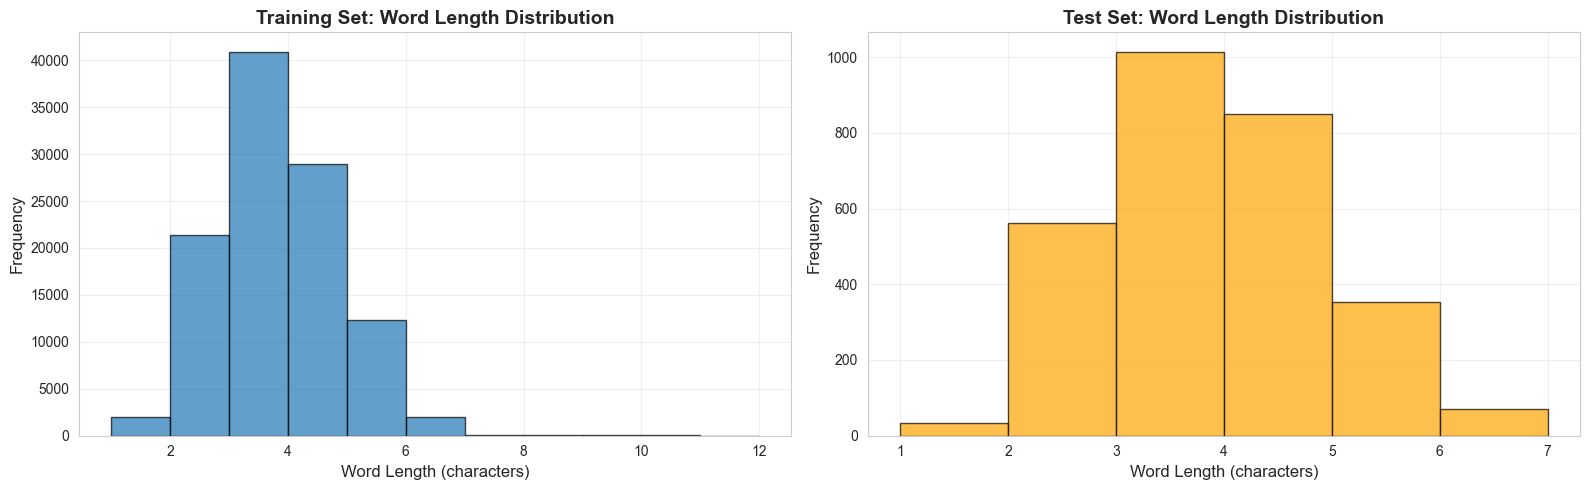

In [101]:
# Word length analysis
train_df['word_length'] = train_df['label'].str.len()
test_df['word_length'] = test_df['label'].str.len()

print("Word Length Statistics:")
print("\nTraining Set:")
print(train_df['word_length'].describe())

print("\nTest Set:")
print(test_df['word_length'].describe())

# Visualize word length distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].hist(train_df['word_length'], bins=range(1, train_df['word_length'].max()+2), 
             edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Word Length (characters)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Training Set: Word Length Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].hist(test_df['word_length'], bins=range(1, test_df['word_length'].max()+2), 
             edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Word Length (characters)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Test Set: Word Length Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Image Analysis

In [102]:
# Analyze ALL image dimensions from the entire dataset
def get_all_image_stats(df):
    """Get statistics about ALL image dimensions in the dataset."""
    widths, heights = [], []
    
    print(f"Processing {len(df):,} images...")
    for idx, img_path in enumerate(df['image_path']):
        if (idx + 1) % 10000 == 0:
            print(f"  Processed {idx + 1:,} / {len(df):,} images...")
        
        if os.path.exists(img_path):
            try:
                img = Image.open(img_path)
                w, h = img.width, img.height
                widths.append(w)
                heights.append(h)
            except:
                pass

    return widths, heights

print("📊 Analyzing ALL image dimensions from the entire dataset...")
print("⚠️ This may take a few minutes...\n")

print("=" * 60)
print("TRAINING SET")
print("=" * 60)
train_widths, train_heights = get_all_image_stats(train_df)

print("\n📐 Training Set Image Dimensions:")
print(f"  • Total images analyzed: {len(train_widths):,}")
print(f"\n  Width Statistics:")
print(f"    - Mean: {np.mean(train_widths):.1f} px")
print(f"    - Std: {np.std(train_widths):.1f} px")
print(f"    - Min: {np.min(train_widths)} px")
print(f"    - Max: {np.max(train_widths)} px")
print(f"    - Median: {np.median(train_widths):.1f} px")
print(f"    - 25th percentile: {np.percentile(train_widths, 25):.1f} px")
print(f"    - 75th percentile: {np.percentile(train_widths, 75):.1f} px")

print(f"\n  Height Statistics:")
print(f"    - Mean: {np.mean(train_heights):.1f} px")
print(f"    - Std: {np.std(train_heights):.1f} px")
print(f"    - Min: {np.min(train_heights)} px")
print(f"    - Max: {np.max(train_heights)} px")
print(f"    - Median: {np.median(train_heights):.1f} px")
print(f"    - 25th percentile: {np.percentile(train_heights, 25):.1f} px")
print(f"    - 75th percentile: {np.percentile(train_heights, 75):.1f} px")

print("\n" + "=" * 60)
print("TEST SET")
print("=" * 60)
test_widths, test_heights = get_all_image_stats(test_df)

print("\n📐 Test Set Image Dimensions:")
print(f"  • Total images analyzed: {len(test_widths):,}")
print(f"\n  Width Statistics:")
print(f"    - Mean: {np.mean(test_widths):.1f} px")
print(f"    - Std: {np.std(test_widths):.1f} px")
print(f"    - Min: {np.min(test_widths)} px")
print(f"    - Max: {np.max(test_widths)} px")
print(f"    - Median: {np.median(test_widths):.1f} px")
print(f"    - 25th percentile: {np.percentile(test_widths, 25):.1f} px")
print(f"    - 75th percentile: {np.percentile(test_widths, 75):.1f} px")

print(f"\n  Height Statistics:")
print(f"    - Mean: {np.mean(test_heights):.1f} px")
print(f"    - Std: {np.std(test_heights):.1f} px")
print(f"    - Min: {np.min(test_heights)} px")
print(f"    - Max: {np.max(test_heights)} px")
print(f"    - Median: {np.median(test_heights):.1f} px")
print(f"    - 25th percentile: {np.percentile(test_heights, 25):.1f} px")
print(f"    - 75th percentile: {np.percentile(test_heights, 75):.1f} px")

📊 Analyzing ALL image dimensions from the entire dataset...
⚠️ This may take a few minutes...

TRAINING SET
Processing 107,607 images...
  Processed 10,000 / 107,607 images...
  Processed 20,000 / 107,607 images...
  Processed 30,000 / 107,607 images...
  Processed 40,000 / 107,607 images...
  Processed 50,000 / 107,607 images...
  Processed 60,000 / 107,607 images...
  Processed 70,000 / 107,607 images...
  Processed 80,000 / 107,607 images...
  Processed 90,000 / 107,607 images...
  Processed 100,000 / 107,607 images...

📐 Training Set Image Dimensions:
  • Total images analyzed: 107,607

  Width Statistics:
    - Mean: 128.0 px
    - Std: 0.0 px
    - Min: 128 px
    - Max: 128 px
    - Median: 128.0 px
    - 25th percentile: 128.0 px
    - 75th percentile: 128.0 px

  Height Statistics:
    - Mean: 98.3 px
    - Std: 32.3 px
    - Min: 23 px
    - Max: 974 px
    - Median: 93.0 px
    - 25th percentile: 77.0 px
    - 75th percentile: 113.0 px

TEST SET
Processing 2,881 images...

📐

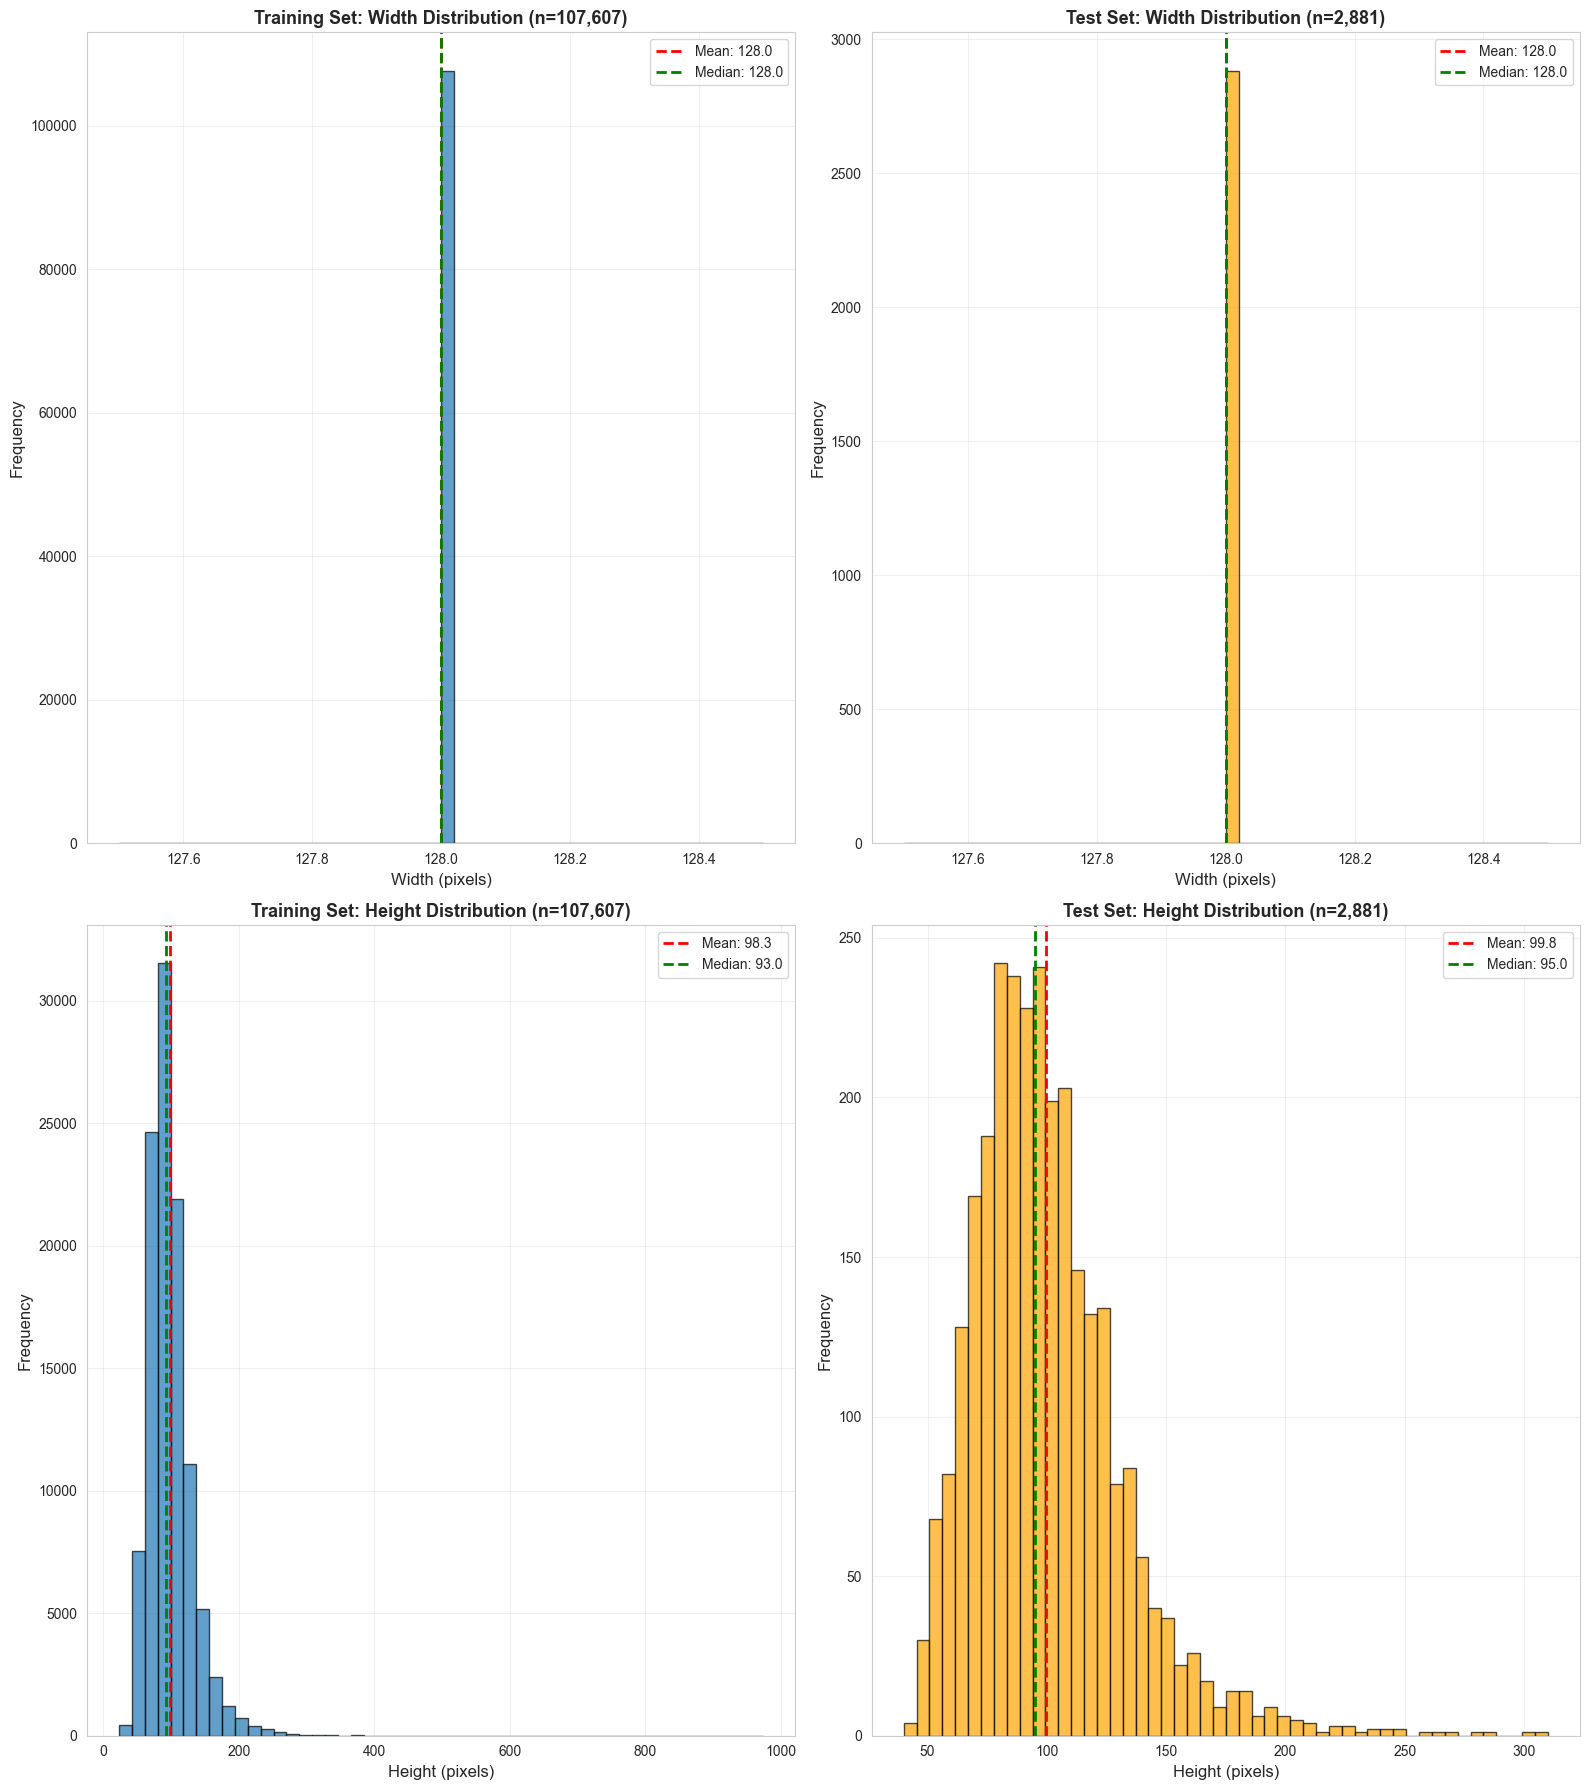

In [103]:
# Visualize ALL image dimensions
fig, axes = plt.subplots(2, 2, figsize=(16, 18))

# Training set - Width and Height distributions
axes[0, 0].hist(train_widths, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Width (pixels)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title(f'Training Set: Width Distribution (n={len(train_widths):,})', fontsize=13, fontweight='bold')
axes[0, 0].axvline(np.mean(train_widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(train_widths):.1f}')
axes[0, 0].axvline(np.median(train_widths), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(train_widths):.1f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(test_widths, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Width (pixels)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title(f'Test Set: Width Distribution (n={len(test_widths):,})', fontsize=13, fontweight='bold')
axes[0, 1].axvline(np.mean(test_widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(test_widths):.1f}')
axes[0, 1].axvline(np.median(test_widths), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(test_widths):.1f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Height distributions
axes[1, 0].hist(train_heights, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Height (pixels)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title(f'Training Set: Height Distribution (n={len(train_heights):,})', fontsize=13, fontweight='bold')
axes[1, 0].axvline(np.mean(train_heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(train_heights):.1f}')
axes[1, 0].axvline(np.median(train_heights), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(train_heights):.1f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(test_heights, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Height (pixels)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title(f'Test Set: Height Distribution (n={len(test_heights):,})', fontsize=13, fontweight='bold')
axes[1, 1].axvline(np.mean(test_heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(test_heights):.1f}')
axes[1, 1].axvline(np.median(test_heights), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(test_heights):.1f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

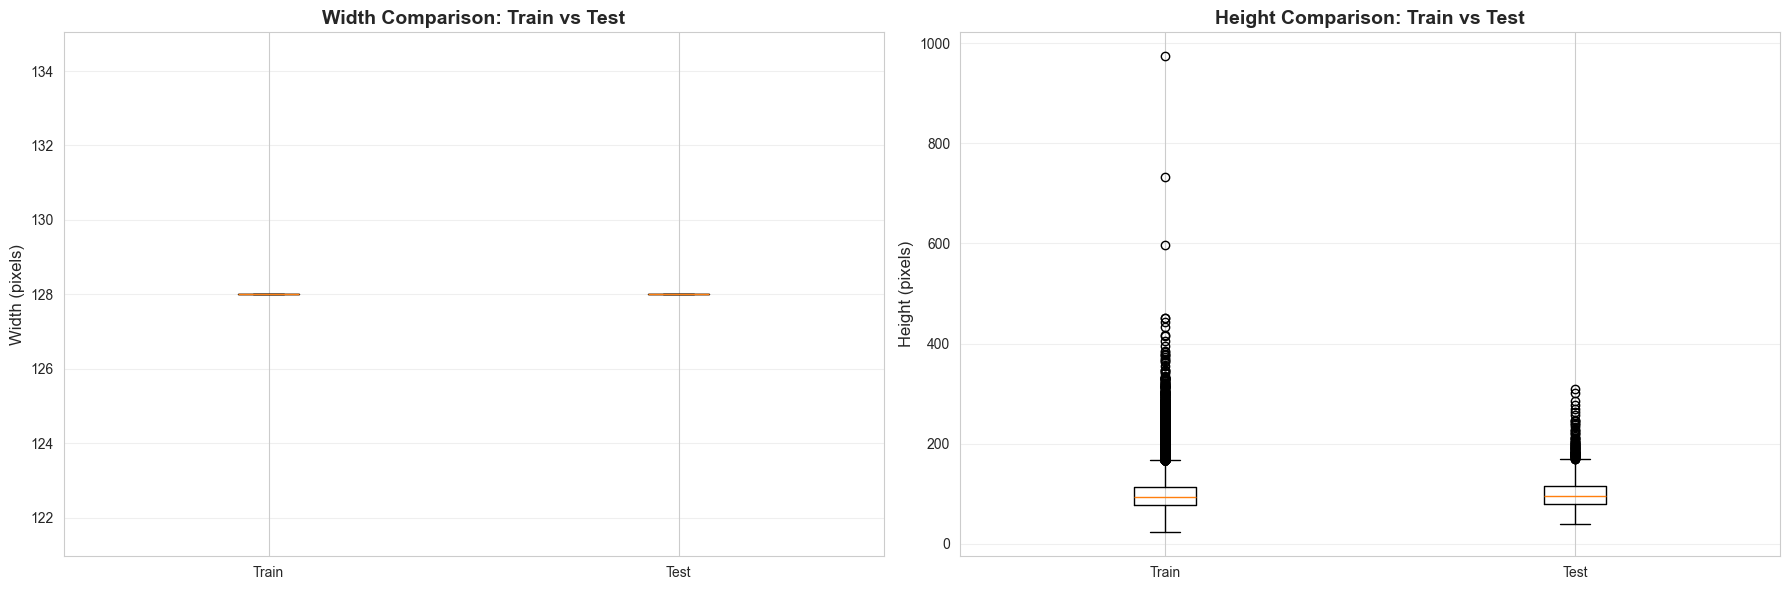


📊 Outlier Analysis (1.5 * IQR method):
🔸 Train Widths:
   • IQR: 0.0 (Q1=128.0, Q3=128.0)
   • Bounds: [128.0, 128.0]
   • Outliers: 0 (0.00%)
🔸 Test Widths:
   • IQR: 0.0 (Q1=128.0, Q3=128.0)
   • Bounds: [128.0, 128.0]
   • Outliers: 0 (0.00%)
--------------------------------------------------
🔸 Train Heights:
   • IQR: 36.0 (Q1=77.0, Q3=113.0)
   • Bounds: [23.0, 167.0]
   • Outliers: 3,661 (3.40%)
🔸 Test Heights:
   • IQR: 36.0 (Q1=79.0, Q3=115.0)
   • Bounds: [25.0, 169.0]
   • Outliers: 88 (3.05%)


In [104]:
# Box plots for comprehensive comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Width comparison
axes[0].boxplot([train_widths, test_widths], labels=['Train', 'Test'])
axes[0].set_ylabel('Width (pixels)', fontsize=12)
axes[0].set_title('Width Comparison: Train vs Test', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Height comparison
axes[1].boxplot([train_heights, test_heights], labels=['Train', 'Test'])
axes[1].set_ylabel('Height (pixels)', fontsize=12)
axes[1].set_title('Height Comparison: Train vs Test', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Calculate and print outlier statistics
def print_outlier_stats(data, name):
    data = np.array(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    pct = len(outliers) / len(data) * 100
    
    print(f"🔸 {name}:")
    print(f"   • IQR: {iqr:.1f} (Q1={q1:.1f}, Q3={q3:.1f})")
    print(f"   • Bounds: [{lower_bound:.1f}, {upper_bound:.1f}]")
    print(f"   • Outliers: {len(outliers):,} ({pct:.2f}%)")

print("\n📊 Outlier Analysis (1.5 * IQR method):")
print("=" * 50)
print_outlier_stats(train_widths, "Train Widths")
print_outlier_stats(test_widths, "Test Widths")
print("-" * 50)
print_outlier_stats(train_heights, "Train Heights")
print_outlier_stats(test_heights, "Test Heights")

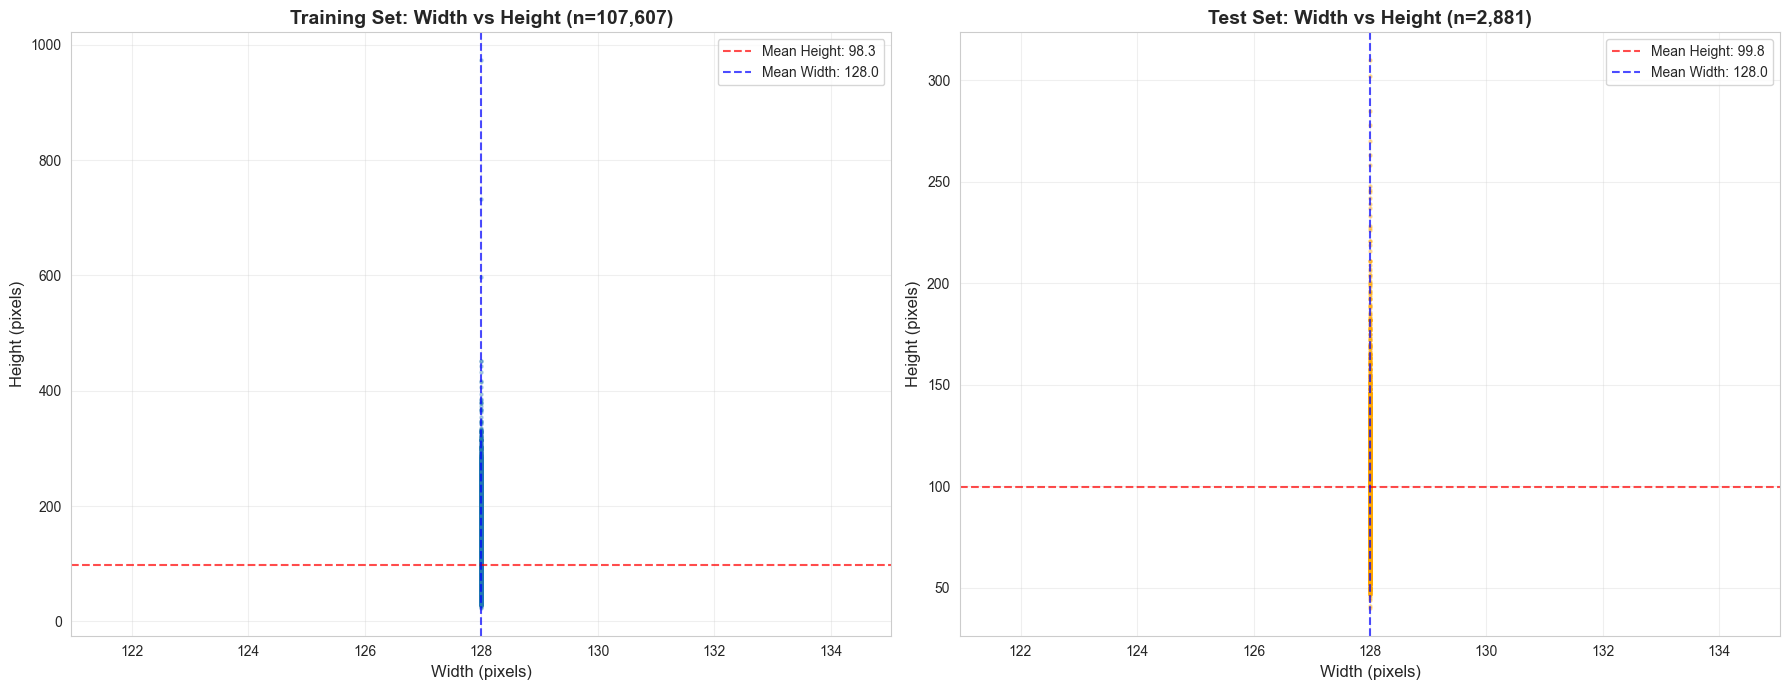

In [105]:
# Scatter plot: Width vs Height for ALL images
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Training set
axes[0].scatter(train_widths, train_heights, alpha=0.3, s=5)
axes[0].set_xlabel('Width (pixels)', fontsize=12)
axes[0].set_ylabel('Height (pixels)', fontsize=12)
axes[0].set_title(f'Training Set: Width vs Height (n={len(train_widths):,})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(np.mean(train_heights), color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Mean Height: {np.mean(train_heights):.1f}')
axes[0].axvline(np.mean(train_widths), color='blue', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Mean Width: {np.mean(train_widths):.1f}')
axes[0].legend()

# Test set
axes[1].scatter(test_widths, test_heights, alpha=0.3, s=5, color='orange')
axes[1].set_xlabel('Width (pixels)', fontsize=12)
axes[1].set_ylabel('Height (pixels)', fontsize=12)
axes[1].set_title(f'Test Set: Width vs Height (n={len(test_widths):,})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(np.mean(test_heights), color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Mean Height: {np.mean(test_heights):.1f}')
axes[1].axvline(np.mean(test_widths), color='blue', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Mean Width: {np.mean(test_widths):.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

## 8. Sample Images Visualization

Training Set Samples:


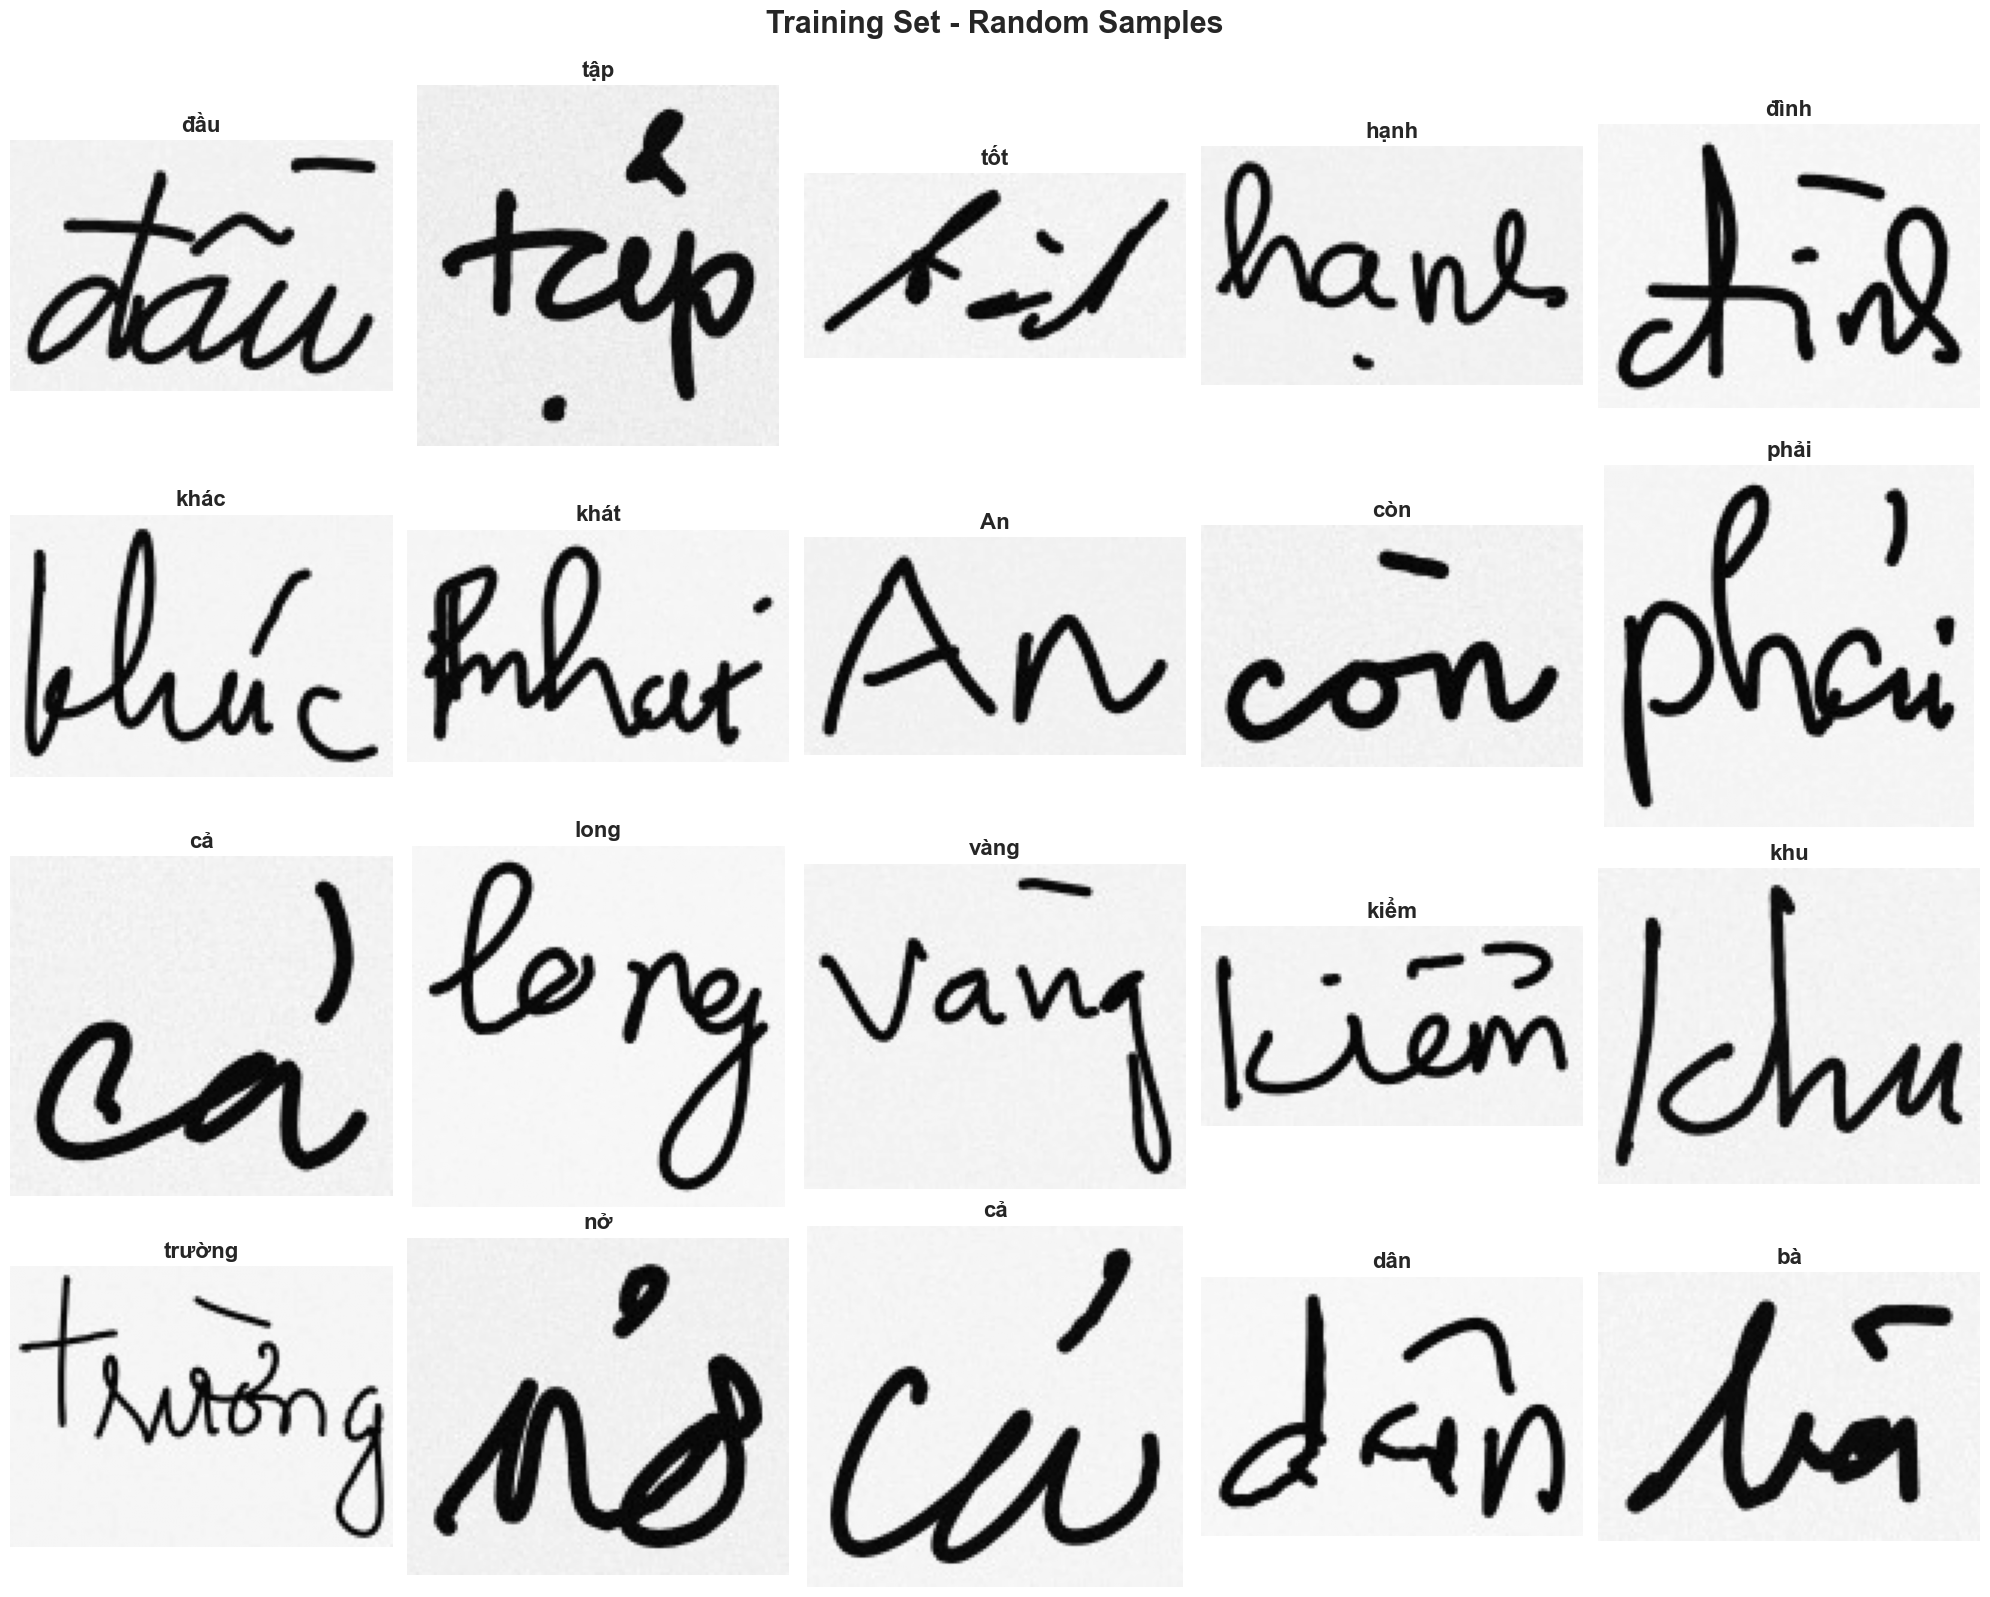

In [106]:
# Display random samples from training set
def display_samples(df, n_samples=20, title="Sample Images"):
    """Display random sample images with their labels."""
    samples = df.sample(n_samples)
    
    rows = 4
    cols = 5
    fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
    axes = axes.flatten()
    
    for idx, (_, row) in enumerate(samples.iterrows()):
        if idx >= n_samples:
            break
        
        img_path = row['image_path']
        if os.path.exists(img_path):
            try:
                img = Image.open(img_path)
                axes[idx].imshow(img, cmap='gray')
                axes[idx].set_title(f"{row['label']}", fontsize=16, fontweight='bold')
                axes[idx].axis('off')
            except Exception as e:
                axes[idx].text(0.5, 0.5, 'Error loading', ha='center', va='center')
                axes[idx].axis('off')
    
    plt.suptitle(title, fontsize=22, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

print("Training Set Samples:")
display_samples(train_df, n_samples=20, title="Training Set - Random Samples")

Test Set Samples:


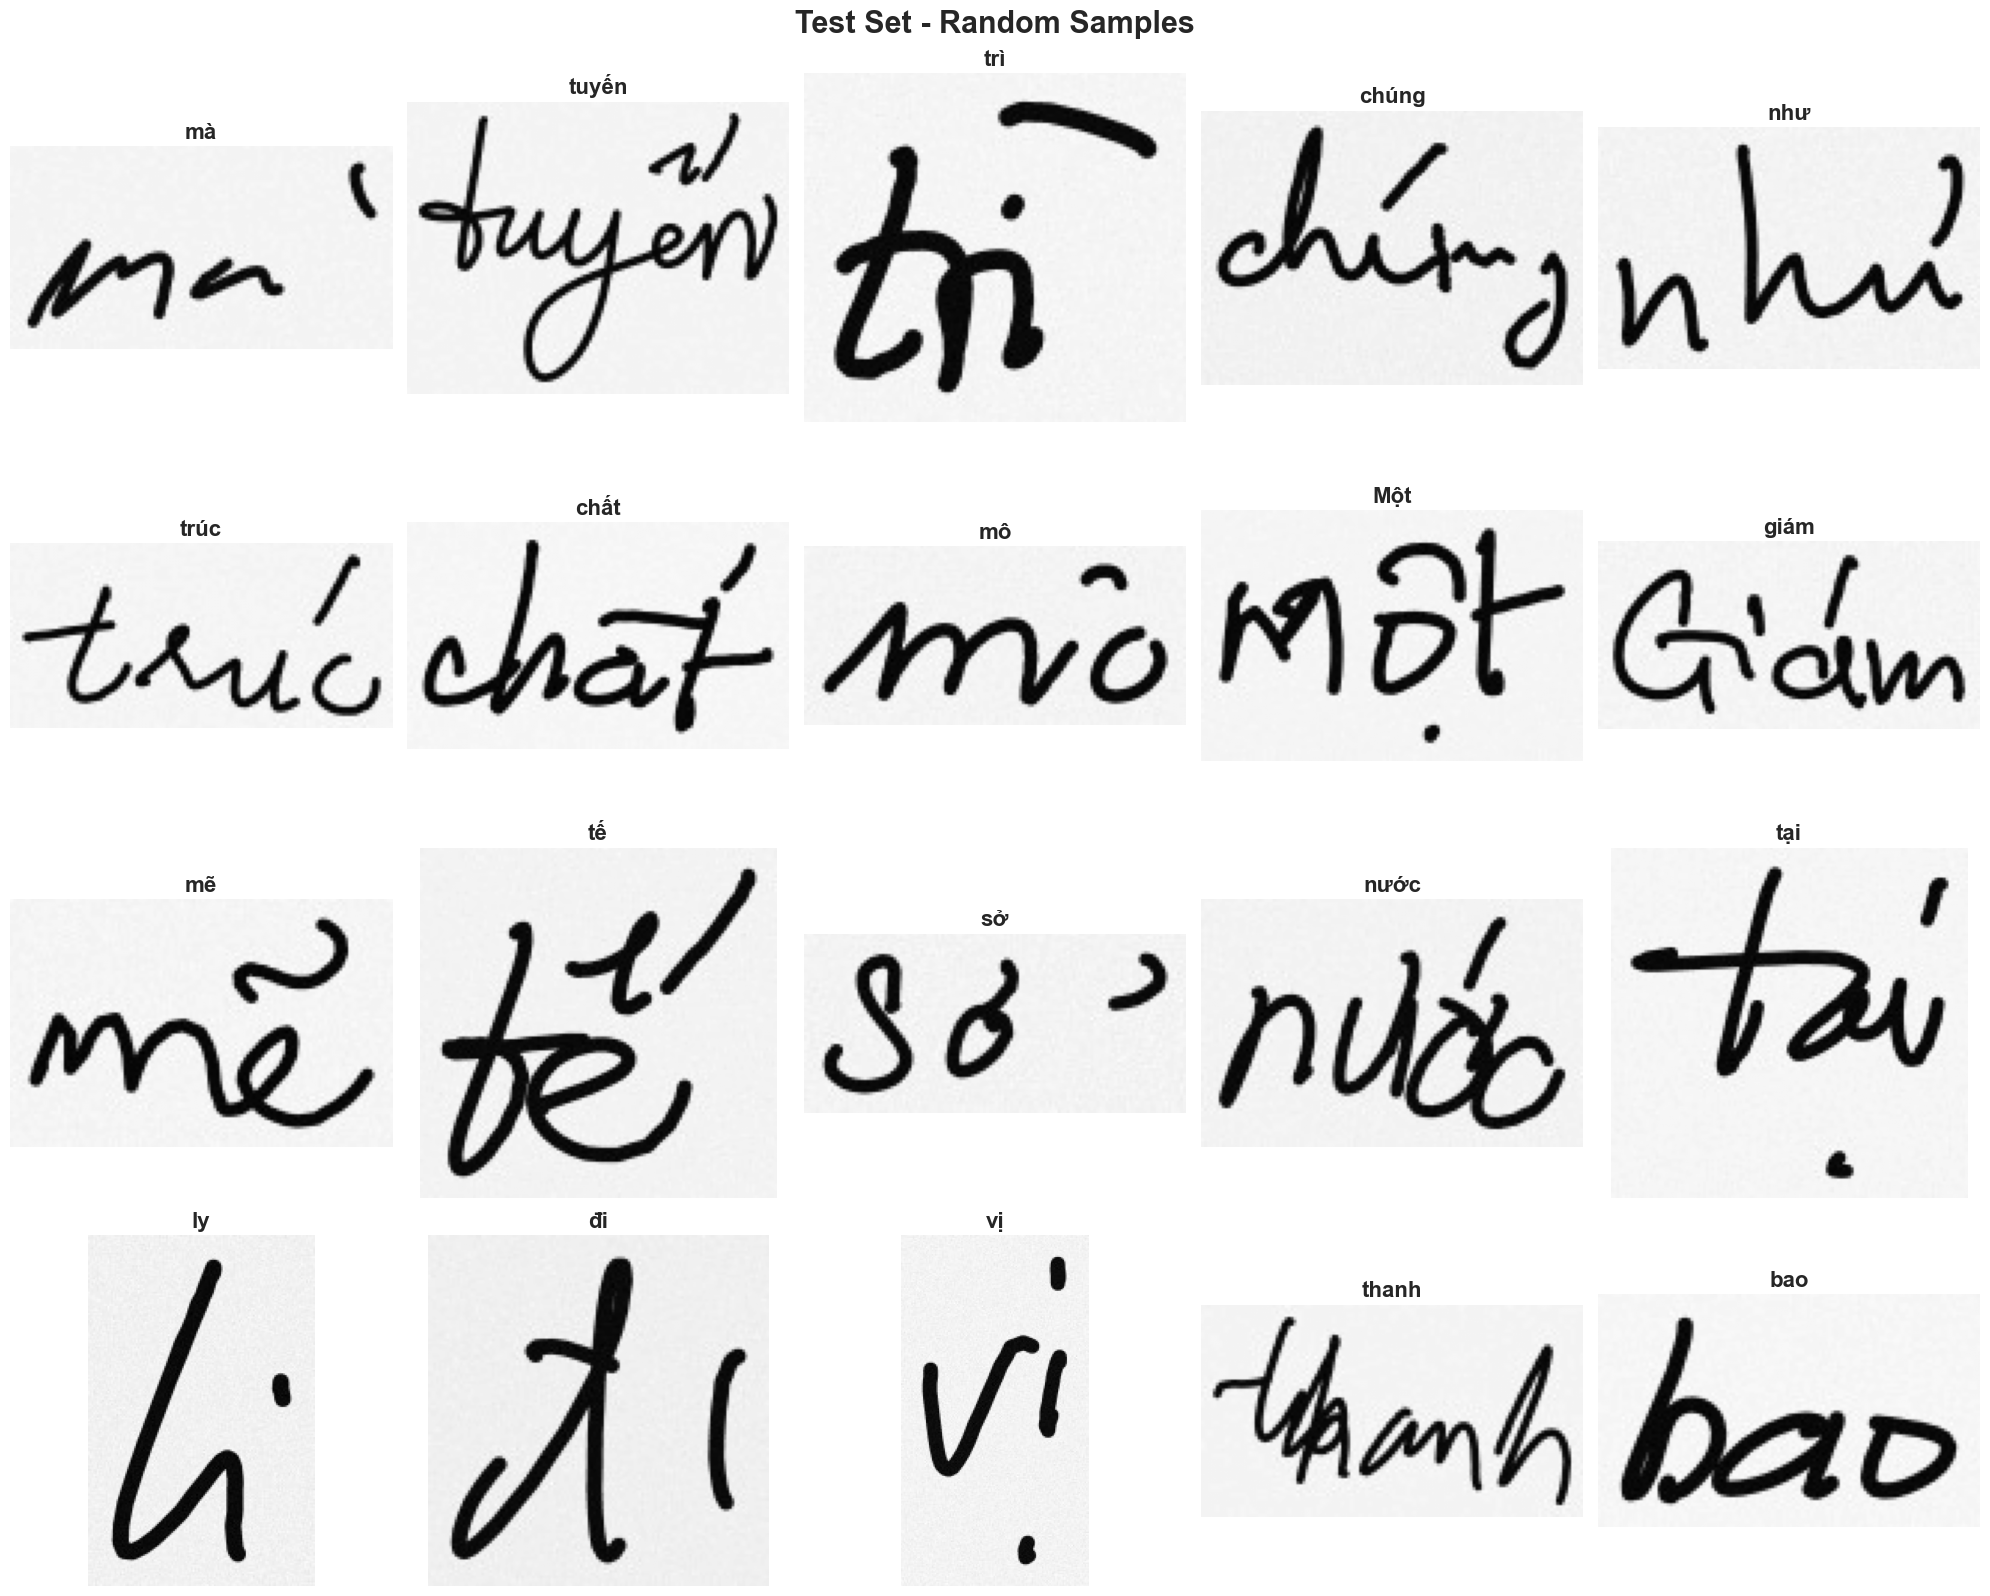

In [107]:
print("Test Set Samples:")
display_samples(test_df, n_samples=20, title="Test Set - Random Samples")

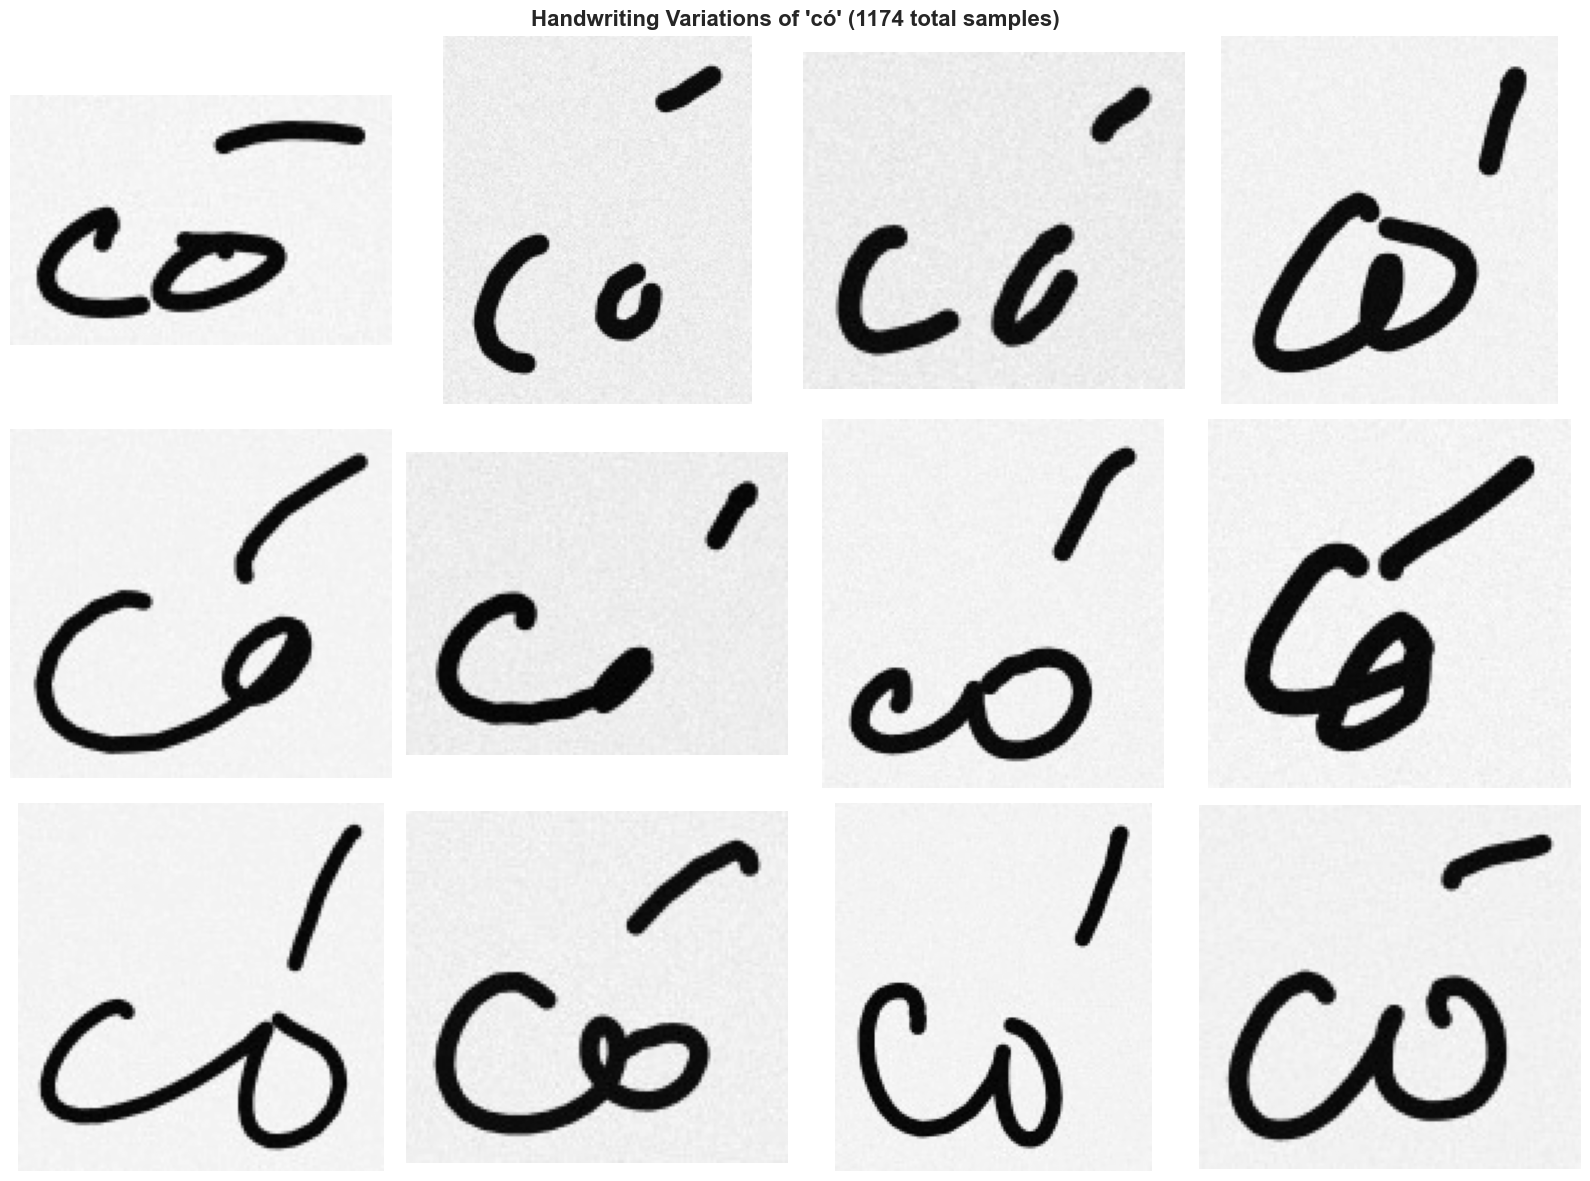

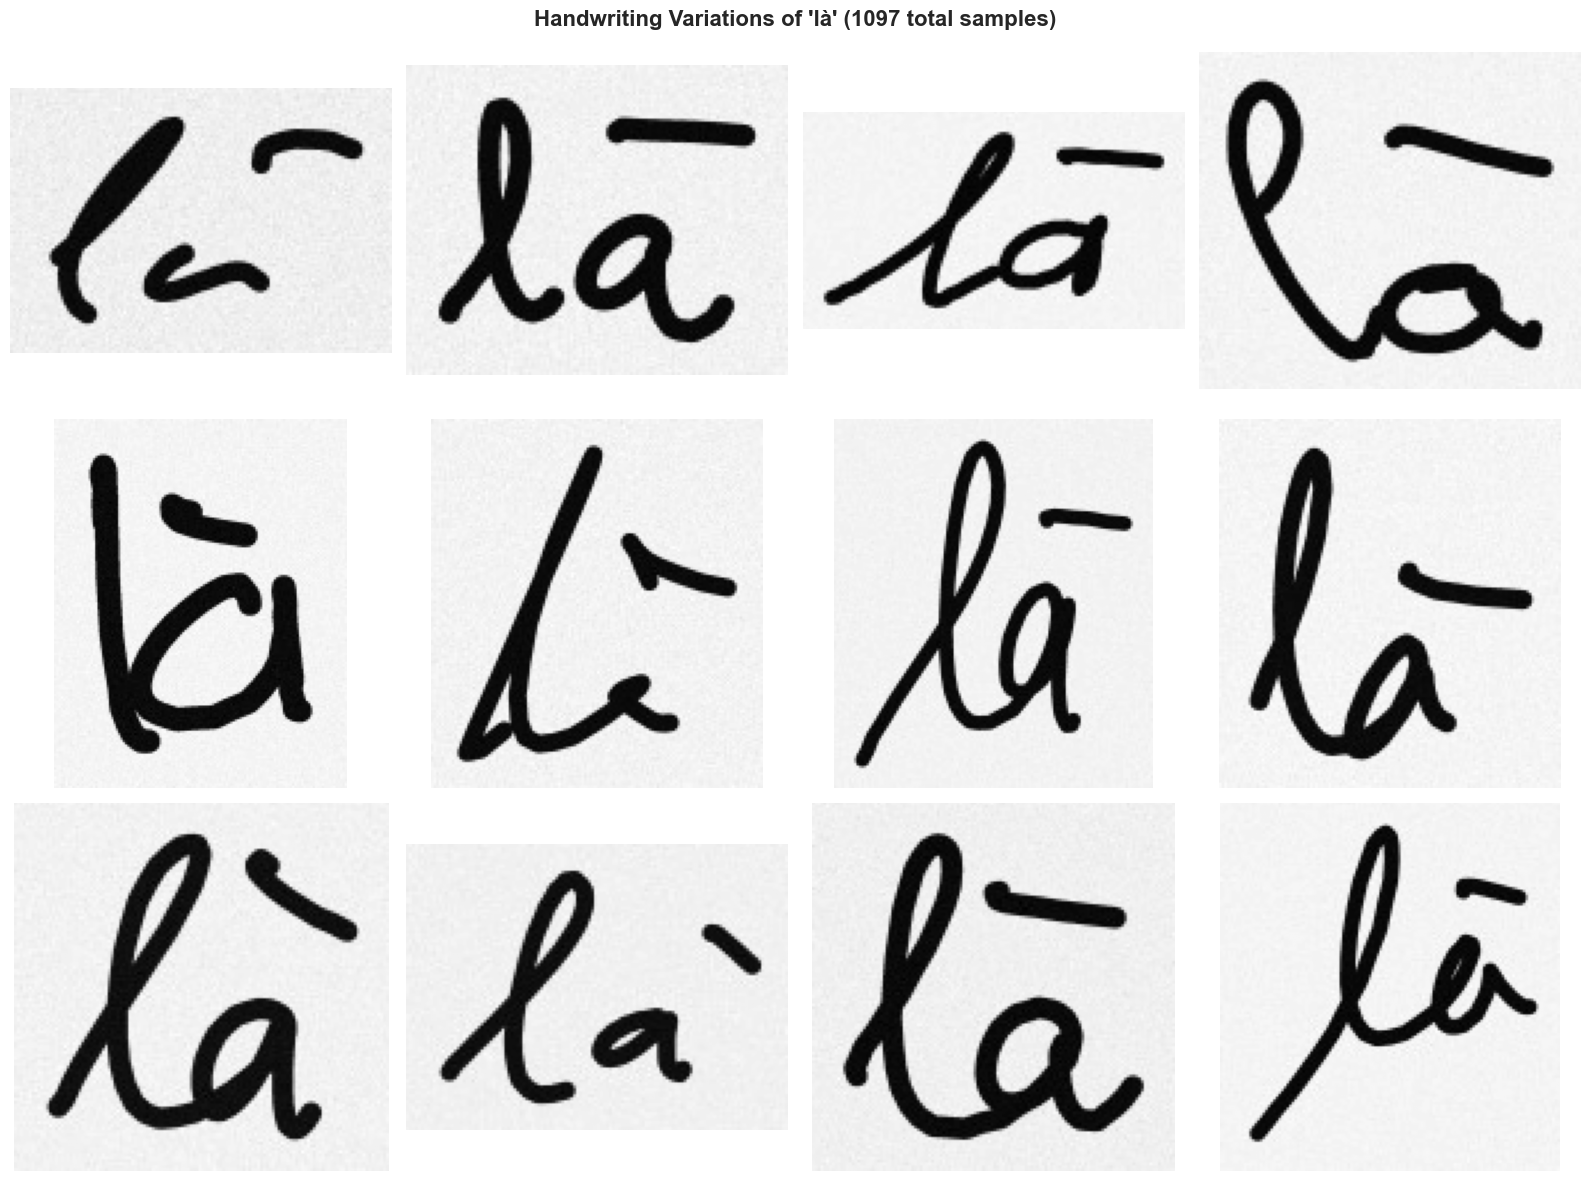

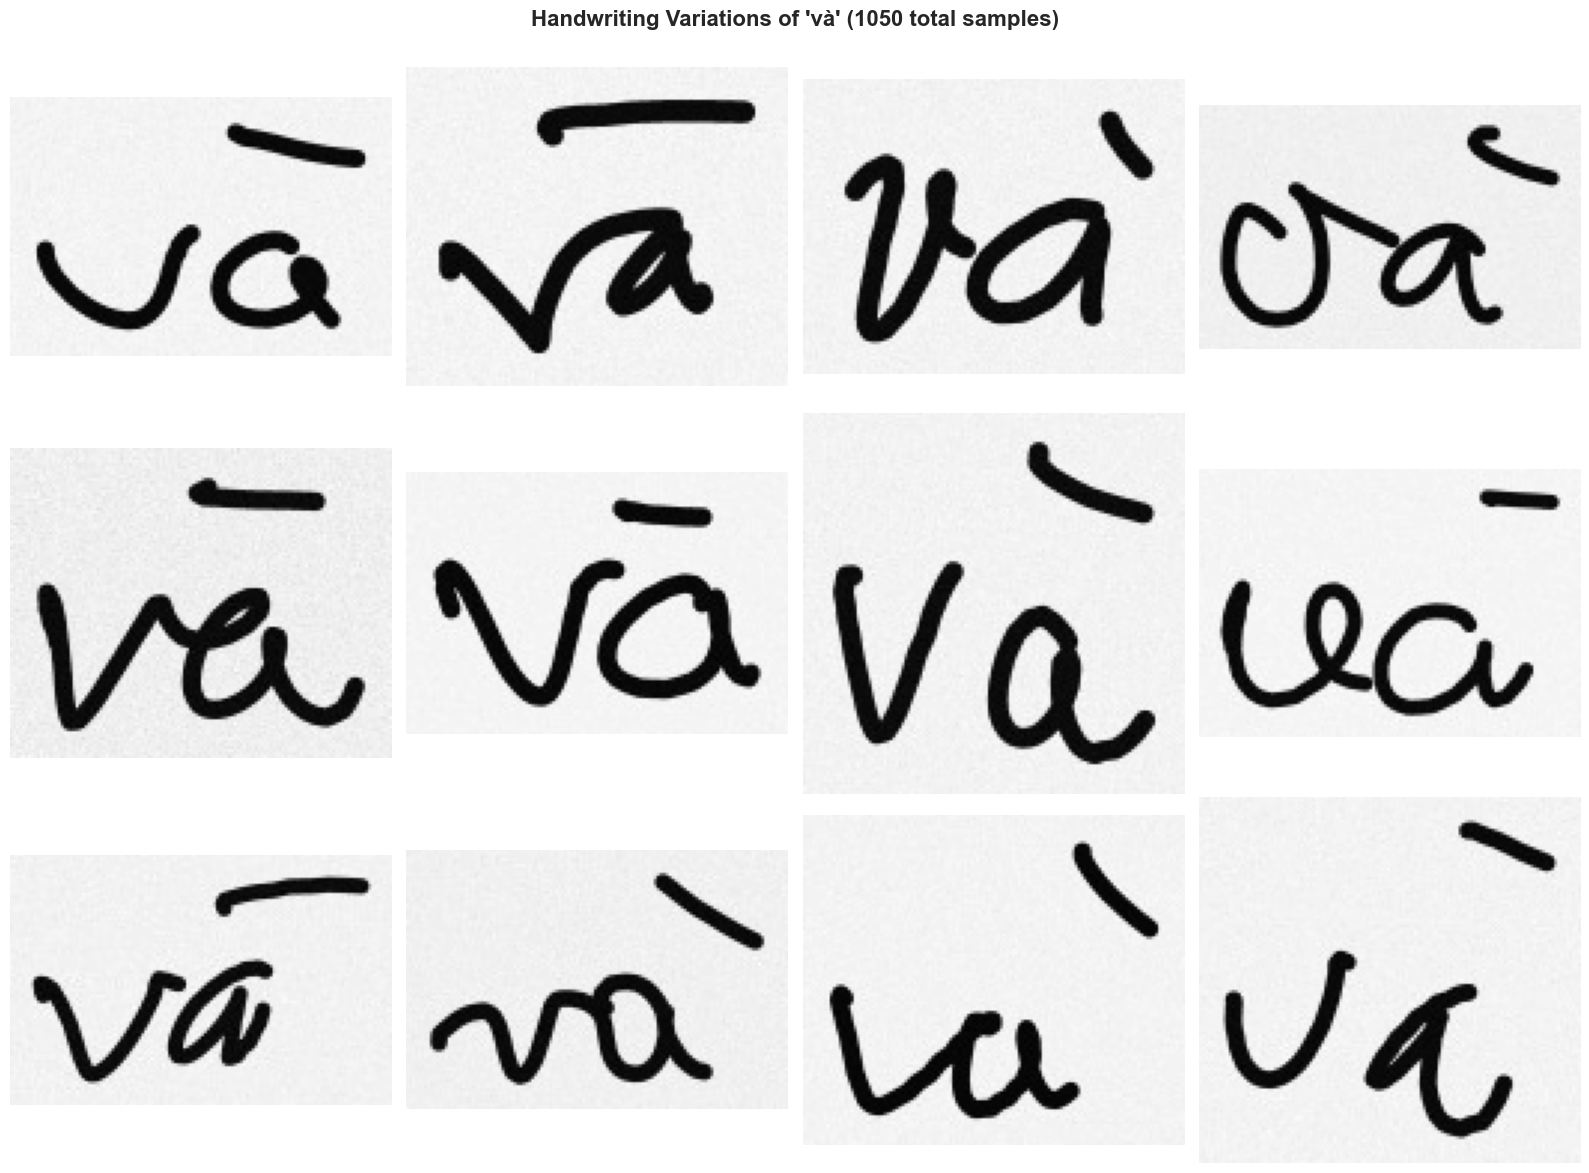

In [108]:
# Display multiple samples of the same word to see handwriting variation
def display_word_variations(df, word, max_samples=12):
    """Display multiple handwriting samples of the same word."""
    word_samples = df[df['label'] == word]
    
    if len(word_samples) == 0:
        print(f"Word '{word}' not found in dataset")
        return
    
    n_samples = min(max_samples, len(word_samples))
    samples = word_samples.sample(n_samples)
    
    rows = 3
    cols = 4
    fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, (_, row) in enumerate(samples.iterrows()):
        if idx >= n_samples:
            break
        
        img_path = row['image_path']
        if os.path.exists(img_path):
            try:
                img = Image.open(img_path)
                axes[idx].imshow(img, cmap='gray')
                axes[idx].axis('off')
            except:
                axes[idx].text(0.5, 0.5, 'Error', ha='center', va='center')
                axes[idx].axis('off')
    
    # Hide unused subplots
    for idx in range(n_samples, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f"Handwriting Variations of '{word}' ({len(word_samples)} total samples)", 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Show variations of most common words
for word in train_label_counts.head(3).index:
    display_word_variations(train_df, word)

## 9. Summary and Key Insights

### Key Findings:

**Dataset Overview:**
- This is a Vietnamese handwriting recognition dataset at the word level
- Contains both training and test sets organized in numbered folders
- Each folder contains images (.jpg) and a label.json file mapping images to their text labels

**Data Distribution:**
- Training data is spread across 249 folders (1-249)
- Test data is in 6 folders (250-255)
- Images are grayscale handwritten Vietnamese words

**Vocabulary Characteristics:**
- The dataset contains Vietnamese words with diacritical marks
- Word frequency follows a long-tail distribution (common in natural language)
- There's significant handwriting variation for the same words

**Image Properties:**
- Images have variable dimensions
- Likely normalized or preprocessed to consistent dimensions for model training
- Clear, scanned handwriting samples

**Considerations for OCR Model:**
- Need to handle Vietnamese diacritical marks correctly
- Must account for handwriting variation (different styles, sizes, slants)
- Class imbalance exists - some words appear much more frequently than others
- May need data augmentation for less frequent words